In [23]:
import pandas as pd
import numpy as np


In [24]:
syllables_original = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/subtlex_v3_IPA_syllables.csv')
syllables_heidfix = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/subtlex_v3_IPA_syllables_heidfix.csv')
syllables_ijfix = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/subtlex_v3_IPA_syllables_ijfix2.csv')

In [25]:
#def function to parse out all unique syllables from each df['Syllables']
#def function to get the frequencies of those syllables
#pairwise scatterplots....
#-each observation is a word
#-x-axis the Minimum syllable frequency of that word
#-y is the same, using a diffrent ruleset.

In [26]:
syllables_original

,Word,FREQcount,CDcount,FREQlow,CDlow,FREQlemma,SUBTLEXWF,Zipf,SUBTLEXCD,Lg10CD,dominant.pos,dominant.pos.freq,dominant.pos.lemma,dominant.pos.lemma.freq,all.pos,all.pos.freq,all.pos.lemma.freq,Status,IPA,Syllables
0,ik,1744062,8054,778704,3125,1744527,39883.0334,7.597064,99.8017,3.9061,VNW,1743609,ik,1743944,.VNW.SPEC.N.VZ.,.1743609.448.4.1.,.1743944.448.134.1.,keep,ˈɪk,ɪk
1,je,1600888,8060,1315051,6535,1600923,36608.9449,7.559864,99.8761,3.9064,VNW,1600798,je,1600798,.VNW.SPEC.N.BW.LID.,.1600798.72.15.2.1.,.1600798.72.50.2.1.,keep,jˈə,jə
2,het,1068396,8066,780771,5578,1913811,24431.9717,7.384235,99.9504,3.9067,VNW,735390,het,735395,.VNW.LID.SPEC.WW.N.,.735390.332929.53.22.2.,.735395.332929.53.845403.31.,keep,hˈət,hət
3,de,1061177,8070,903872,6512,1063827,24266.8883,7.381291,100.0000,3.9069,LID,1060098,de,1062748,.LID.VNW.SPEC.VZ.,.1060098.806.272.1.,.1062748.806.272.1.,keep,dˈə,də
4,dat,965424,8063,715570,6107,965431,22077.2184,7.340221,99.9133,3.9066,VNW,532576,dat,532576,.VNW.VG.SPEC.N.WW.,.532576.432794.51.2.1.,.532576.432794.51.9.1.,keep,dˈɑt,dɑt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270349,aagh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,SPEC,1,aagh,1,.SPEC.,.1.,.1.,keep,ˈaːx,aːx
270350,aagghh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,N,1,aagghh,1,.N.,.1.,.1.,keep,ˈaːx,aːx
270351,aagezien,1,1,1,1,1,0.0229,1.656532,0.0124,0.3010,WW,1,aazien,1,.WW.,.1.,.1.,keep,ˌaːɣəzˈin,aː - ɣə - zin
270352,aaf,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,SPEC,1,aaf,1,.SPEC.,.1.,.1.,keep,ˈaːf,aːf


In [27]:
def get_syllables(df):
    syllables = []
    if 'Syllables' not in df.columns:
        raise ValueError("DataFrame does not contain a 'Syllables' column")
    
    for i in range(len(df)):
        value = df['Syllables'][i]
        if isinstance(value, str):
            syllables += value.split(" - ")
        elif pd.isna(value):
            continue
        else:
            print(f"Non-string value at index {i}: {value}")
    
    return list(set(syllables))

In [28]:
original_syllables = get_syllables(syllables_original)
heidfix_syllables = get_syllables(syllables_heidfix)
ijfix_syllables = get_syllables(syllables_ijfix)

In [29]:
len(original_syllables), len(heidfix_syllables), len(ijfix_syllables)
#ijfix adds about 600 syllables. heidfix removes about 142 syllables.

(23149, 23007, 23756)

In [30]:
def get_syllable_frequencies(df, syllables):
    syllable_freqs = {s: 0 for s in syllables}
    if 'Syllables' not in df.columns:
        raise ValueError("DataFrame does not contain a 'Syllables' column")
    
    for i in range(len(df)):
        value = df['Syllables'][i]
        if isinstance(value, str):
            for s in value.split(" - "):
                syllable_freqs[s] += df['FREQcount'][i]
        elif pd.isna(value):
            continue
        else:
            print(f"Non-string value at index {i}: {value}")
    
    return syllable_freqs

In [31]:
original_frequencies = get_syllable_frequencies(syllables_original, original_syllables)
#log10
original_frequencies = {s: round(np.log10(f), 2) for s, f in original_frequencies.items()}
#return the rarest syllable in each word
#drop rows of nan values
syllables_original = syllables_original.dropna(subset=['Syllables'])
syllables_original['MinFreqSyllable'] = syllables_original['Syllables'].apply(
    lambda x: min([(s, original_frequencies[s]) for s in x.split(" - ")], key=lambda item: item[1])
)


/tmp/ipykernel_3786513/1072056075.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syllables_original['MinFreqSyllable'] = syllables_original['Syllables'].apply(


In [32]:
syllables_original

,Word,FREQcount,CDcount,FREQlow,CDlow,FREQlemma,SUBTLEXWF,Zipf,SUBTLEXCD,Lg10CD,...,dominant.pos.freq,dominant.pos.lemma,dominant.pos.lemma.freq,all.pos,all.pos.freq,all.pos.lemma.freq,Status,IPA,Syllables,MinFreqSyllable
0,ik,1744062,8054,778704,3125,1744527,39883.0334,7.597064,99.8017,3.9061,...,1743609,ik,1743944,.VNW.SPEC.N.VZ.,.1743609.448.4.1.,.1743944.448.134.1.,keep,ˈɪk,ɪk,"(ɪk, 6.26)"
1,je,1600888,8060,1315051,6535,1600923,36608.9449,7.559864,99.8761,3.9064,...,1600798,je,1600798,.VNW.SPEC.N.BW.LID.,.1600798.72.15.2.1.,.1600798.72.50.2.1.,keep,jˈə,jə,"(jə, 6.23)"
2,het,1068396,8066,780771,5578,1913811,24431.9717,7.384235,99.9504,3.9067,...,735390,het,735395,.VNW.LID.SPEC.WW.N.,.735390.332929.53.22.2.,.735395.332929.53.845403.31.,keep,hˈət,hət,"(hət, 6.03)"
3,de,1061177,8070,903872,6512,1063827,24266.8883,7.381291,100.0000,3.9069,...,1060098,de,1062748,.LID.VNW.SPEC.VZ.,.1060098.806.272.1.,.1062748.806.272.1.,keep,dˈə,də,"(də, 6.21)"
4,dat,965424,8063,715570,6107,965431,22077.2184,7.340221,99.9133,3.9066,...,532576,dat,532576,.VNW.VG.SPEC.N.WW.,.532576.432794.51.2.1.,.532576.432794.51.9.1.,keep,dˈɑt,dɑt,"(dɑt, 6.01)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270349,aagh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aagh,1,.SPEC.,.1.,.1.,keep,ˈaːx,aːx,"(aːx, 1.34)"
270350,aagghh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aagghh,1,.N.,.1.,.1.,keep,ˈaːx,aːx,"(aːx, 1.34)"
270351,aagezien,1,1,1,1,1,0.0229,1.656532,0.0124,0.3010,...,1,aazien,1,.WW.,.1.,.1.,keep,ˌaːɣəzˈin,aː - ɣə - zin,"(zin, 5.01)"
270352,aaf,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aaf,1,.SPEC.,.1.,.1.,keep,ˈaːf,aːf,"(aːf, 1.53)"


In [34]:
#do the same for the other two dataframes
heidfix_frequencies = get_syllable_frequencies(syllables_heidfix, heidfix_syllables)
heidfix_frequencies = {s: round(np.log10(f), 2) for s, f in heidfix_frequencies.items()}
syllables_heidfix = syllables_heidfix.dropna(subset=['Syllables'])
syllables_heidfix['MinFreqSyllable'] = syllables_heidfix['Syllables'].apply(
    lambda x: min([(s, heidfix_frequencies[s]) for s in x.split(" - ")], key=lambda item: item[1])
)

In [35]:
syllables_heidfix

,Word,FREQcount,CDcount,FREQlow,CDlow,FREQlemma,SUBTLEXWF,Zipf,SUBTLEXCD,Lg10CD,...,dominant.pos.freq,dominant.pos.lemma,dominant.pos.lemma.freq,all.pos,all.pos.freq,all.pos.lemma.freq,Status,IPA,Syllables,MinFreqSyllable
0,ik,1744062,8054,778704,3125,1744527,39883.0334,7.597064,99.8017,3.9061,...,1743609,ik,1743944,.VNW.SPEC.N.VZ.,.1743609.448.4.1.,.1743944.448.134.1.,keep,ˈɪk,ɪk,"(ɪk, 6.26)"
1,je,1600888,8060,1315051,6535,1600923,36608.9449,7.559864,99.8761,3.9064,...,1600798,je,1600798,.VNW.SPEC.N.BW.LID.,.1600798.72.15.2.1.,.1600798.72.50.2.1.,keep,jˈə,jə,"(jə, 6.23)"
2,het,1068396,8066,780771,5578,1913811,24431.9717,7.384235,99.9504,3.9067,...,735390,het,735395,.VNW.LID.SPEC.WW.N.,.735390.332929.53.22.2.,.735395.332929.53.845403.31.,keep,hˈət,hət,"(hət, 6.03)"
3,de,1061177,8070,903872,6512,1063827,24266.8883,7.381291,100.0000,3.9069,...,1060098,de,1062748,.LID.VNW.SPEC.VZ.,.1060098.806.272.1.,.1062748.806.272.1.,keep,dˈə,də,"(də, 6.21)"
4,dat,965424,8063,715570,6107,965431,22077.2184,7.340221,99.9133,3.9066,...,532576,dat,532576,.VNW.VG.SPEC.N.WW.,.532576.432794.51.2.1.,.532576.432794.51.9.1.,keep,dˈɑt,dɑt,"(dɑt, 6.01)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270349,aagh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aagh,1,.SPEC.,.1.,.1.,keep,ˈaːx,aːx,"(aːx, 1.34)"
270350,aagghh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aagghh,1,.N.,.1.,.1.,keep,ˈaːx,aːx,"(aːx, 1.34)"
270351,aagezien,1,1,1,1,1,0.0229,1.656532,0.0124,0.3010,...,1,aazien,1,.WW.,.1.,.1.,keep,ˌaːɣəzˈin,aː - ɣə - zin,"(zin, 5.01)"
270352,aaf,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aaf,1,.SPEC.,.1.,.1.,keep,ˈaːf,aːf,"(aːf, 1.53)"


In [36]:
#do the same for ijfix
ijfix_frequencies = get_syllable_frequencies(syllables_ijfix, ijfix_syllables)
ijfix_frequencies = {s: round(np.log10(f), 2) for s, f in ijfix_frequencies.items()}
syllables_ijfix = syllables_ijfix.dropna(subset=['Syllables'])
syllables_ijfix['MinFreqSyllable'] = syllables_ijfix['Syllables'].apply(
    lambda x: min([(s, ijfix_frequencies[s]) for s in x.split(" - ")], key=lambda item: item[1])
)


In [37]:
syllables_ijfix

,Word,FREQcount,CDcount,FREQlow,CDlow,FREQlemma,SUBTLEXWF,Zipf,SUBTLEXCD,Lg10CD,...,dominant.pos.freq,dominant.pos.lemma,dominant.pos.lemma.freq,all.pos,all.pos.freq,all.pos.lemma.freq,Status,IPA,Syllables,MinFreqSyllable
0,ik,1744062,8054,778704,3125,1744527,39883.0334,7.597064,99.8017,3.9061,...,1743609,ik,1743944,.VNW.SPEC.N.VZ.,.1743609.448.4.1.,.1743944.448.134.1.,keep,ˈɪk,ɪk,"(ɪk, 6.24)"
1,je,1600888,8060,1315051,6535,1600923,36608.9449,7.559864,99.8761,3.9064,...,1600798,je,1600798,.VNW.SPEC.N.BW.LID.,.1600798.72.15.2.1.,.1600798.72.50.2.1.,keep,jˈə,jə,"(jə, 6.23)"
2,het,1068396,8066,780771,5578,1913811,24431.9717,7.384235,99.9504,3.9067,...,735390,het,735395,.VNW.LID.SPEC.WW.N.,.735390.332929.53.22.2.,.735395.332929.53.845403.31.,keep,hˈət,hət,"(hət, 6.03)"
3,de,1061177,8070,903872,6512,1063827,24266.8883,7.381291,100.0000,3.9069,...,1060098,de,1062748,.LID.VNW.SPEC.VZ.,.1060098.806.272.1.,.1062748.806.272.1.,keep,dˈə,də,"(də, 6.21)"
4,dat,965424,8063,715570,6107,965431,22077.2184,7.340221,99.9133,3.9066,...,532576,dat,532576,.VNW.VG.SPEC.N.WW.,.532576.432794.51.2.1.,.532576.432794.51.9.1.,keep,dˈɑt,dɑt,"(dɑt, 6.01)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270349,aagh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aagh,1,.SPEC.,.1.,.1.,keep,ˈaːx,aːx,"(aːx, 1.34)"
270350,aagghh,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aagghh,1,.N.,.1.,.1.,keep,ˈaːx,aːx,"(aːx, 1.34)"
270351,aagezien,1,1,1,1,1,0.0229,1.656532,0.0124,0.3010,...,1,aazien,1,.WW.,.1.,.1.,keep,ˌaːɣəzˈin,aː - ɣə - zin,"(zin, 5.01)"
270352,aaf,1,1,0,0,1,0.0229,1.656532,0.0124,0.3010,...,1,aaf,1,.SPEC.,.1.,.1.,keep,ˈaːf,aːf,"(aːf, 1.53)"


In [39]:
#merged dfs.
master_df = pd.DataFrame(columns = ['Word','OriginalIPA','Heidfix_IPA','IJfix_IPA','Original_MinFreq','Heidfix_MinFreq','IJfix_MinFreq'])
master_df['Word'] = syllables_original['Word']
master_df['OriginalIPA'] = syllables_original['Syllables']
master_df['Heidfix_IPA'] = syllables_heidfix['Syllables']
master_df['IJfix_IPA'] = syllables_ijfix['Syllables']
master_df['Original_MinFreq'] = syllables_original['MinFreqSyllable'].apply(lambda x: x[1])
master_df['Heidfix_MinFreq'] = syllables_heidfix['MinFreqSyllable'].apply(lambda x: x[1])
master_df['IJfix_MinFreq'] = syllables_ijfix['MinFreqSyllable'].apply(lambda x: x[1])


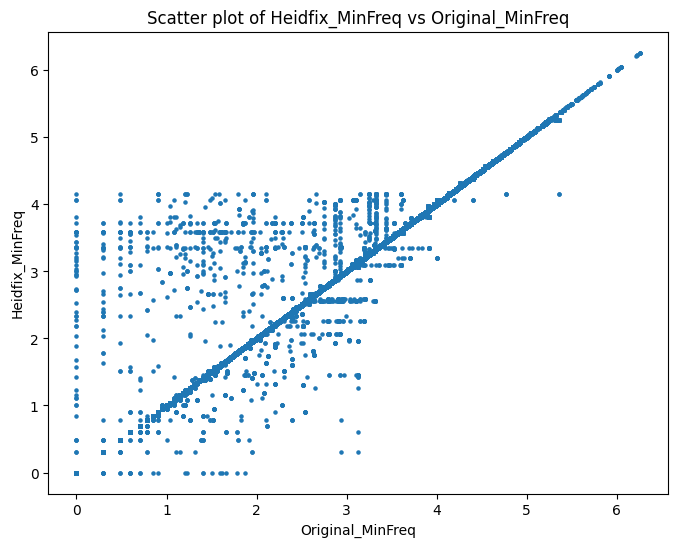

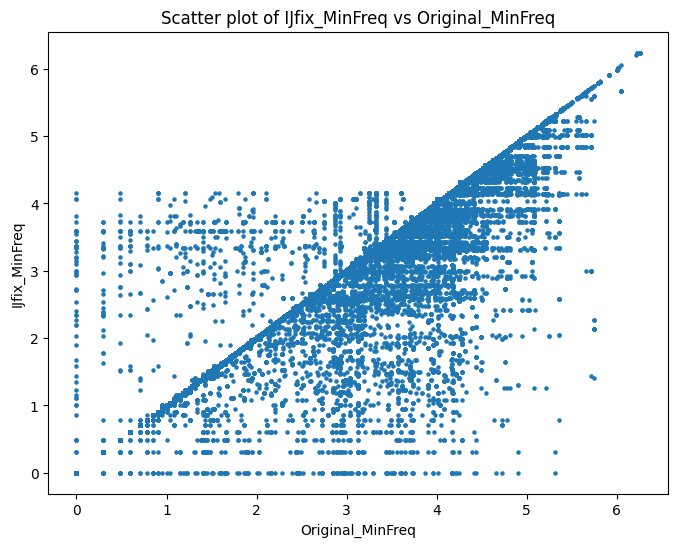

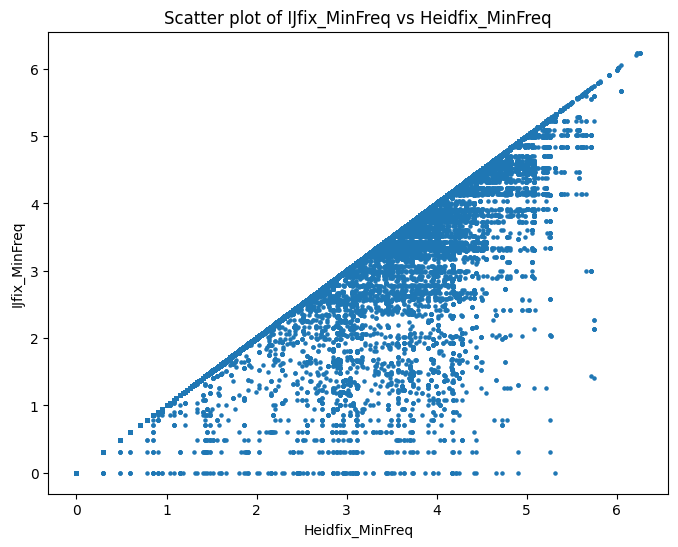

In [44]:
import matplotlib.pyplot as plt

# Assuming the dataframe is named syllables_original and contains the three columns
columns = ['Original_MinFreq', 'Heidfix_MinFreq', 'IJfix_MinFreq']

# Create scatter plots for each pair of columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(master_df[columns[i]], master_df[columns[j]],s=5)
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.title(f'Scatter plot of {columns[j]} vs {columns[i]}')
        plt.show()
#please make the dots smaller and show the correlation coefficient.
